In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Visualisation of Prediction - Artifical Signal

In [13]:
artifical_data = pd.read_csv("../../files/classification/MLE/variance_data_new.csv", sep=";")
artifical_data.head()

,ID,y_true target,y_true mu predicted,y_true sigma predicted,mean normalised residual,y_true normalised residual,Anomaly Sensor_1,time,mu,sigma
0,36.0,2.967731,0.889366,0.899758,2.309915,2.309915,1,-2.951984,31.526878,0.072
1,37.0,2.927548,0.886010,0.899554,2.269501,2.269501,1,-2.950650,31.116795,0.074
2,38.0,2.881940,0.880735,0.899149,2.225667,2.225667,1,-2.949316,30.699020,0.076
3,39.0,2.851870,0.874446,0.898681,2.200362,2.200362,1,-2.947983,30.273691,0.078
4,40.0,2.813981,0.869935,0.898383,2.163939,2.163939,1,-2.946649,29.840949,0.080


In [14]:
mean_trainings_data = 0.06844859
variance_trainings_data = 112.93894129

In [15]:
artifical_data["y_true target"] = artifical_data["y_true target"] * np.sqrt(variance_trainings_data)
artifical_data["y_true mu predicted"] = artifical_data["y_true mu predicted"] * np.sqrt(variance_trainings_data)
#artifical_data["y_true sigma predicted"] = artifical_data["y_true sigma predicted"] * np.sqrt(variance_trainings_data)
artifical_data["y_true target"] = artifical_data["y_true target"] + mean_trainings_data
artifical_data["y_true mu predicted"] = artifical_data["y_true mu predicted"] + mean_trainings_data
#artifical_data["y_true sigma predicted"] = artifical_data["y_true sigma predicted"] + mean_trainings_data
artifical_data["constant sigma_1"] = 2
artifical_data["constant sigma_2"] = 5

In [16]:
artifical_data.head()

,ID,y_true target,y_true mu predicted,y_true sigma predicted,mean normalised residual,y_true normalised residual,Anomaly Sensor_1,time,mu,sigma,constant sigma_1,constant sigma_2
0,36.0,31.607335,9.519981,0.899758,2.309915,2.309915,1,-2.951984,31.526878,0.072,2,5
1,37.0,31.180299,9.484318,0.899554,2.269501,2.269501,1,-2.950650,31.116795,0.074,2,5
2,38.0,30.695617,9.428255,0.899149,2.225667,2.225667,1,-2.949316,30.699020,0.076,2,5
3,39.0,30.376052,9.361421,0.898681,2.200362,2.200362,1,-2.947983,30.273691,0.078,2,5
4,40.0,29.973390,9.313487,0.898383,2.163939,2.163939,1,-2.946649,29.840949,0.080,2,5


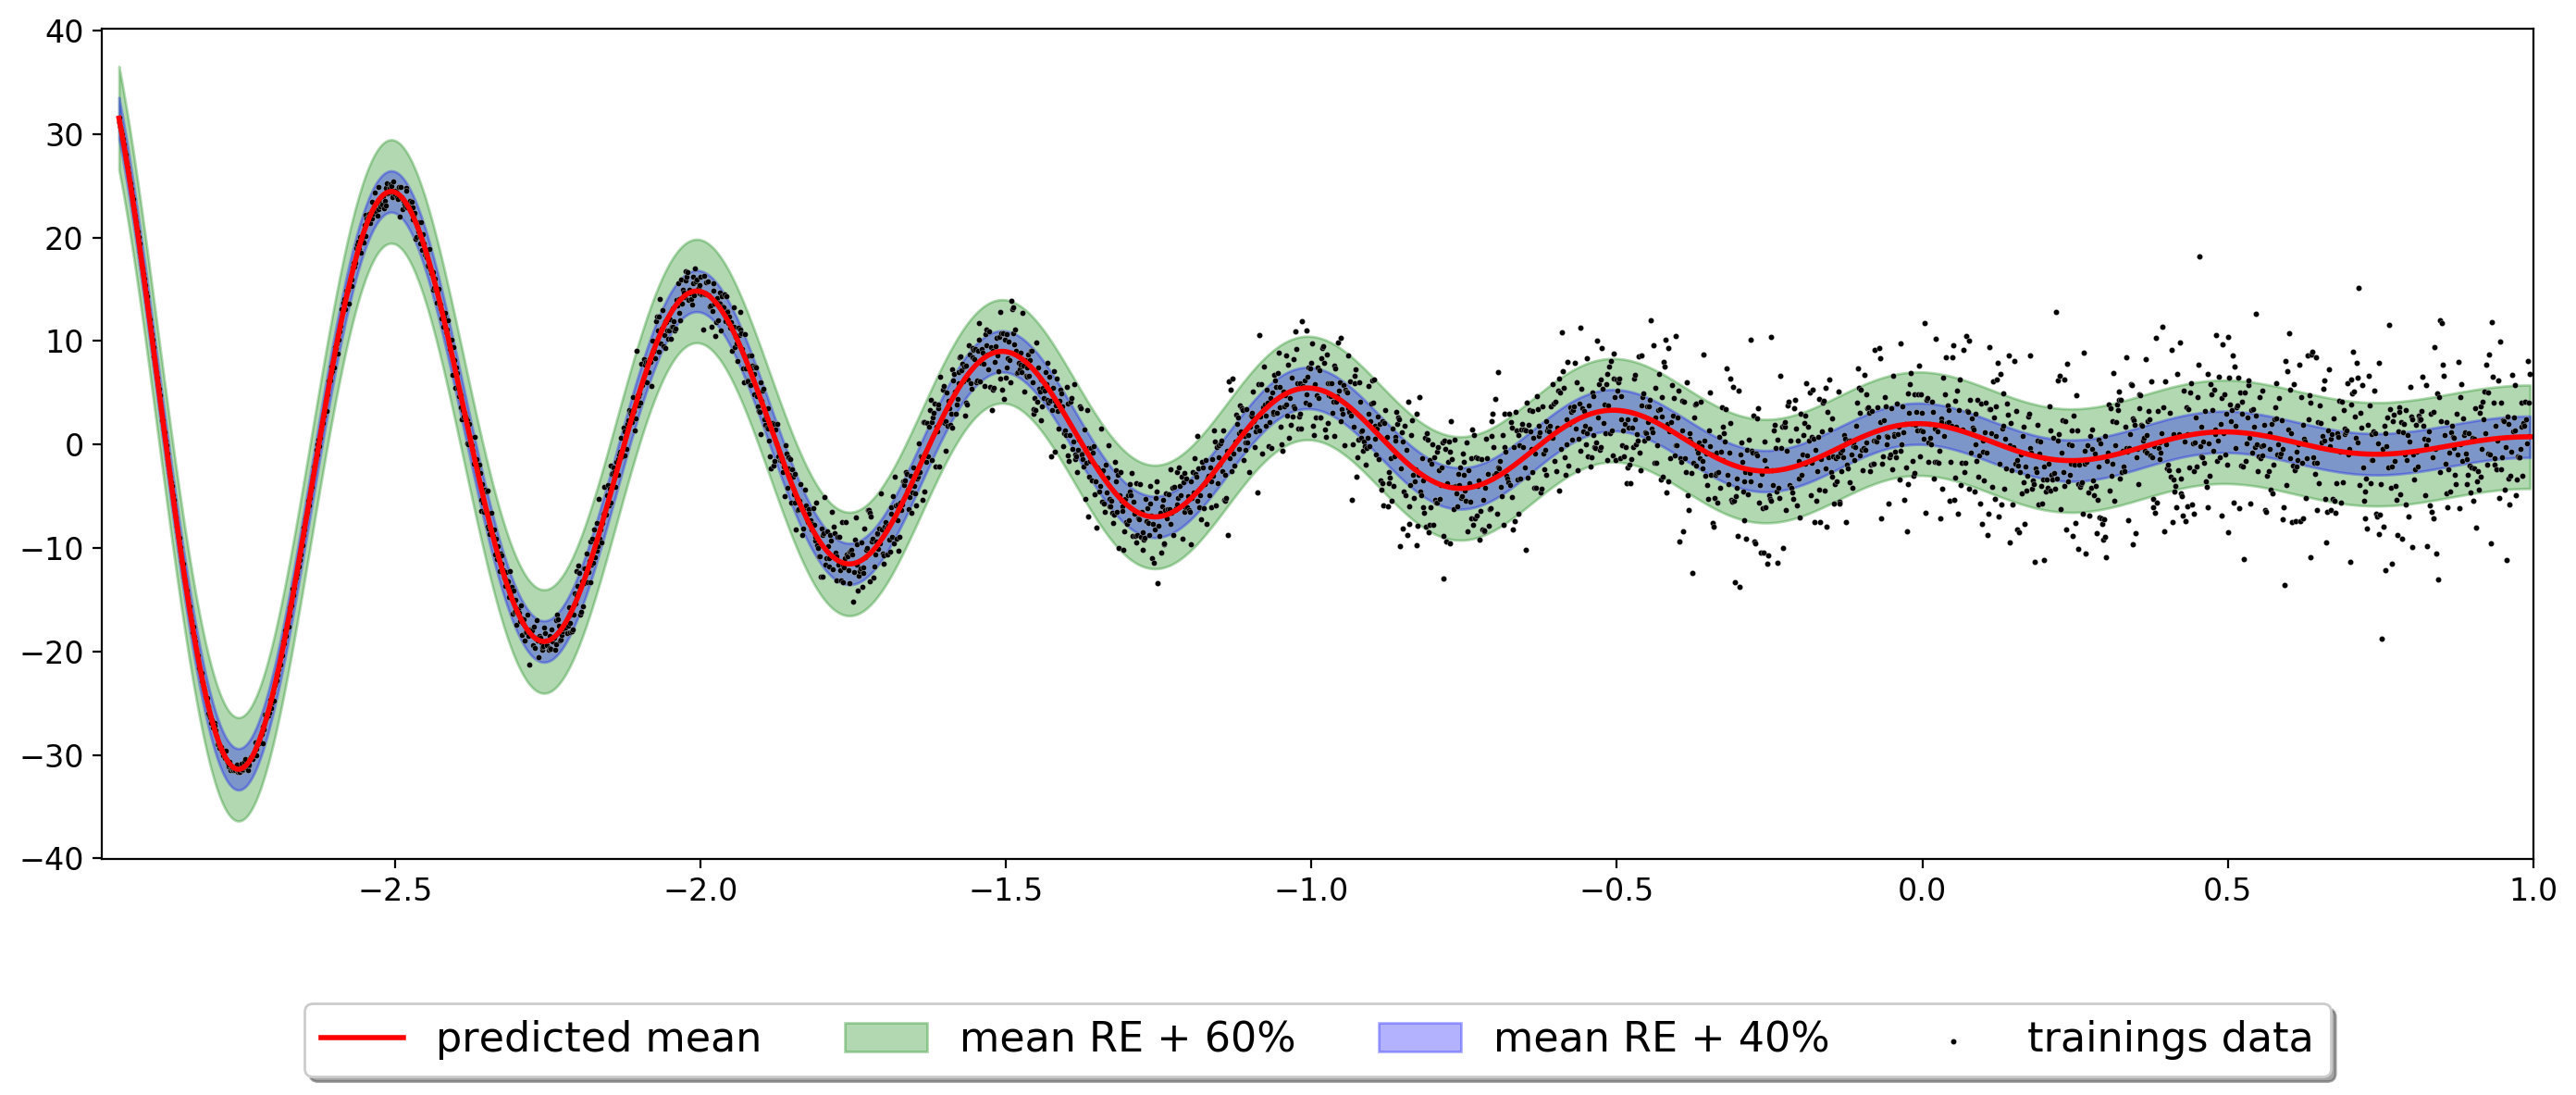

In [31]:
fig = plt.figure(figsize=(14,6), dpi=200)
ax = fig.add_subplot(111)
time = artifical_data["time"].values
training_data = artifical_data.iloc[:,1].values


# Predicted sigma band
mu_predicted = artifical_data.iloc[:,8].values
sigma_predicted = artifical_data.iloc[:,11].values
lower_bound_predicted = mu_predicted - sigma_predicted
upper_bound_predicted = mu_predicted + sigma_predicted
ax.fill_between(time, lower_bound_predicted, upper_bound_predicted, color="green", alpha=0.3, label="mean RE + 60%")


# True sigma band
mu_true = artifical_data.iloc[:,8].values
sigma_true = artifical_data.iloc[:,10].values
lower_bound_true = mu_true - sigma_true
upper_bound_true = mu_true + sigma_true
ax.fill_between(time, lower_bound_true, upper_bound_true, color="blue", alpha=0.3, label="mean RE + 40%")


"""
# predicted mean
sns.lineplot(
             x=time, 
             y=mu_predicted, 
             ax=ax, 
             color="blue",
             label="predicted mean",
             linewidth=2)
"""

# true mean
sns.lineplot(
             x=time, 
             y=mu_true, 
             ax=ax, 
             color="red",
             label="predicted mean",
             linewidth=2)


# training data
sns.scatterplot(
                x=time, 
                y=training_data,
                ax=ax,
                color="black",
                s=5,
                label="trainings data",
                linewidth=0.1)
      
# Set labels etc. 
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, -0.15),
           fancybox=True, 
           shadow=True, 
           ncol=6,
           prop={'size': 16})
ax.set_ylabel("")
ax.set_xlim(-2.98,1)
ax.tick_params(labelsize=12)
#ax.set_title("Idealized representation of prediction results", fontsize=18)
plt.tight_layout(pad=1)
plt.savefig("./pictures/prediction_variance_MSE_paper.png")
plt.show()

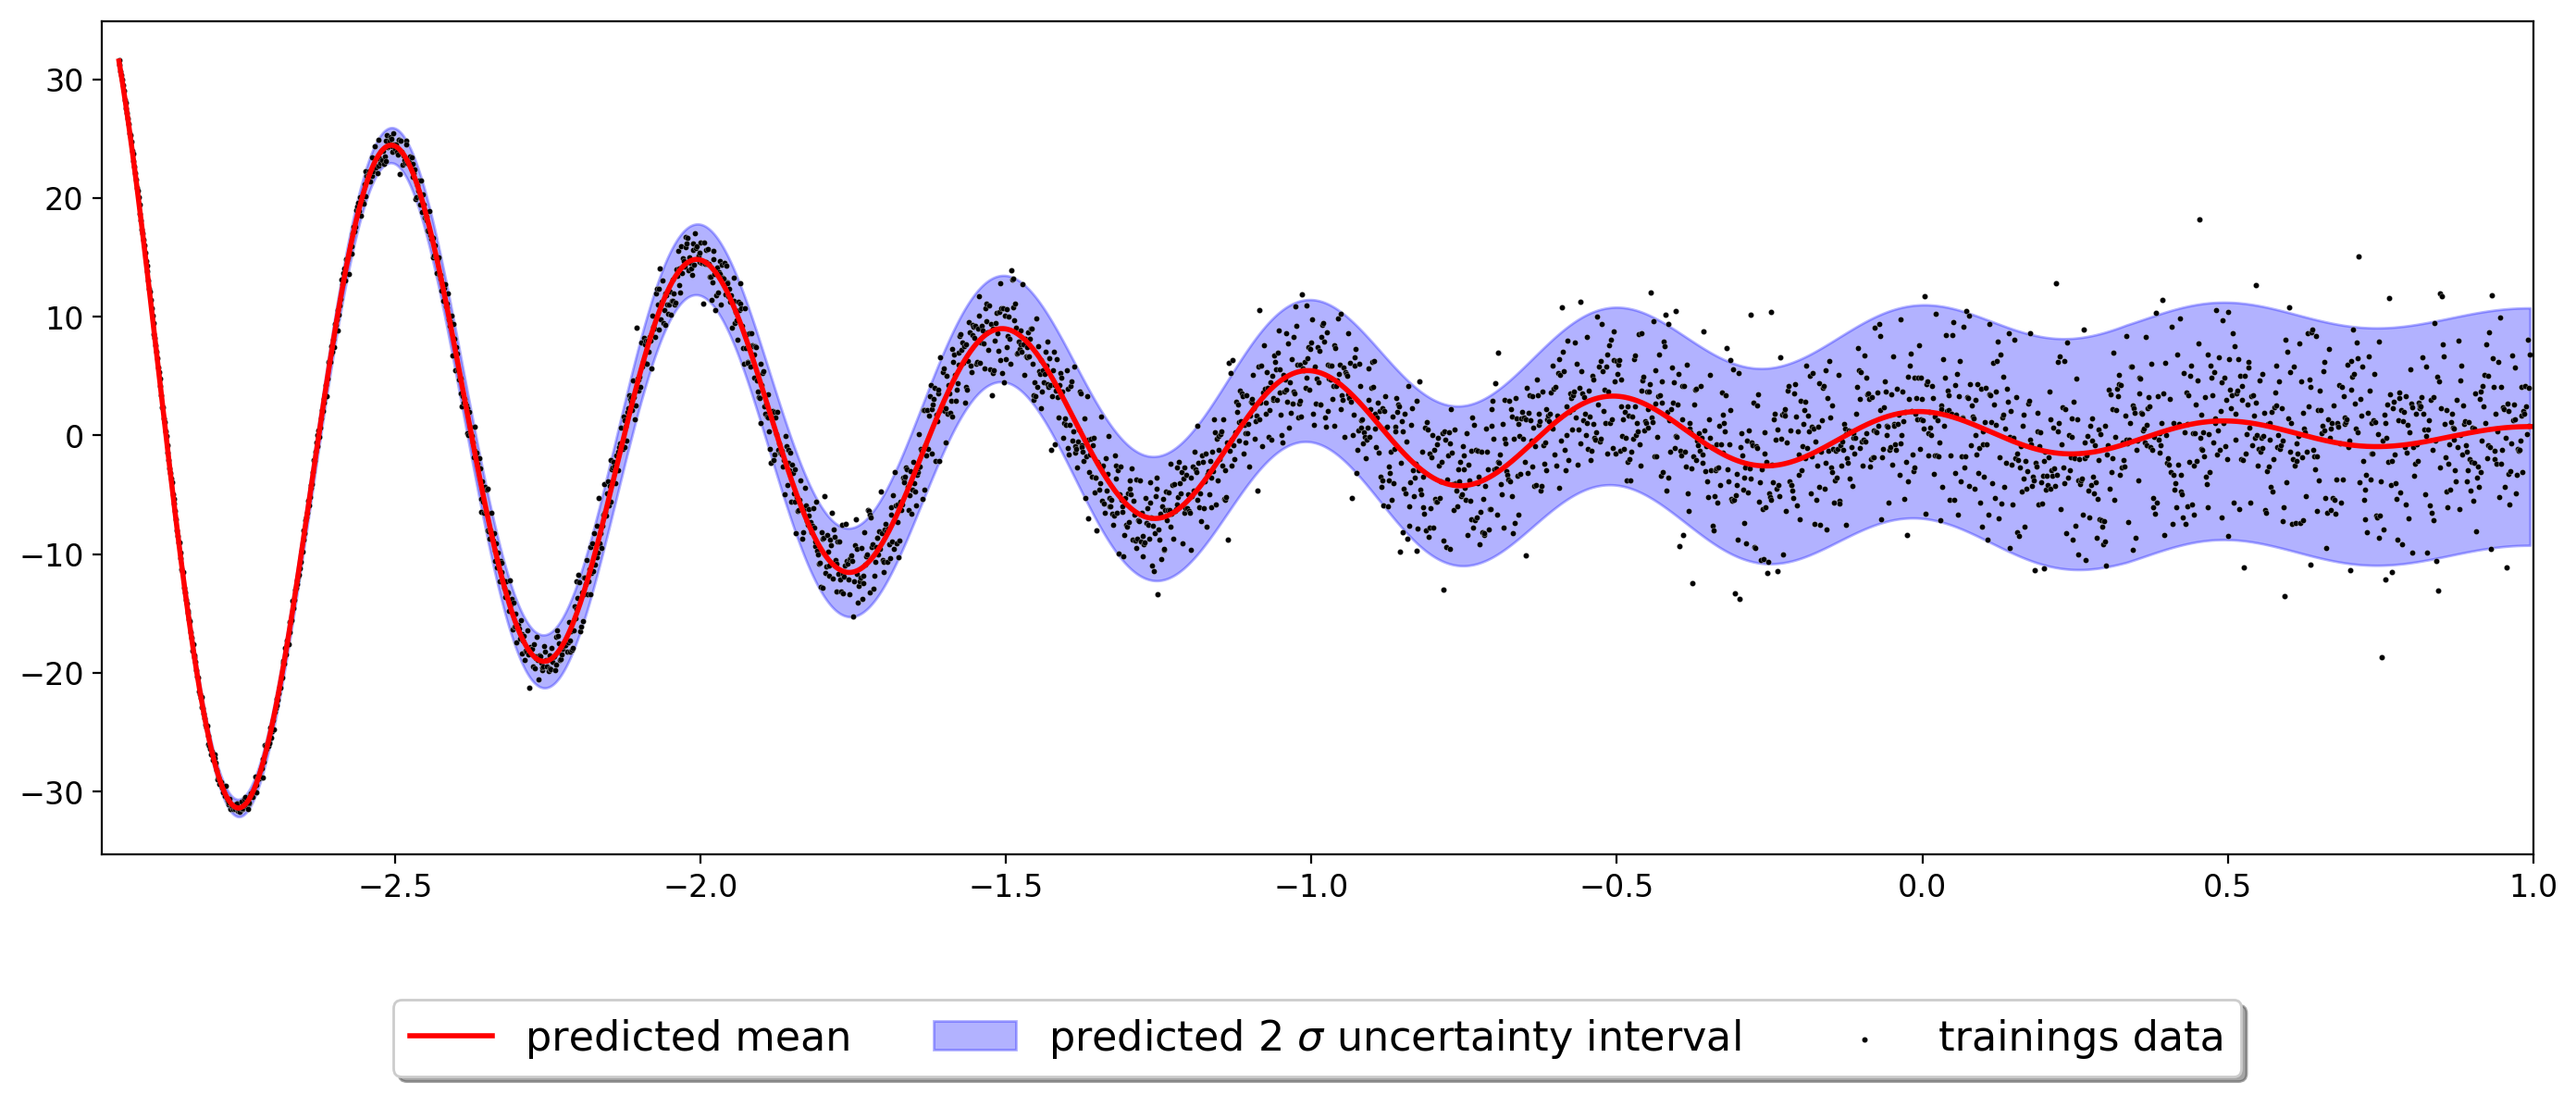

In [32]:
fig = plt.figure(figsize=(14,6), dpi=200)
ax = fig.add_subplot(111)
time = artifical_data["time"].values
training_data = artifical_data.iloc[:,1].values


# Predicted sigma band
mu_predicted = artifical_data.iloc[:,8].values
sigma_predicted = artifical_data.iloc[:,9].values
lower_bound_predicted = mu_predicted - 2*sigma_predicted
upper_bound_predicted = mu_predicted + 2*sigma_predicted
ax.fill_between(time, lower_bound_predicted, upper_bound_predicted, color="blue", alpha=0.3, label="predicted 2 $\sigma$ uncertainty interval")


"""
# predicted mean
sns.lineplot(
             x=time, 
             y=mu_predicted, 
             ax=ax, 
             color="blue",
             label="predicted mean",
             linewidth=2)
"""

# true mean
sns.lineplot(
             x=time, 
             y=mu_true, 
             ax=ax, 
             color="red",
             label="predicted mean",
             linewidth=2)


# training data
sns.scatterplot(
                x=time, 
                y=training_data,
                ax=ax,
                color="black",
                s=5,
                label="trainings data",
                linewidth=0.1)
      
# Set labels etc. 
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, -0.15),
           fancybox=True, 
           shadow=True, 
           ncol=6,
           prop={'size': 16})
ax.set_ylabel("")
ax.set_xlim(-2.98,1)
ax.tick_params(labelsize=12)
#ax.set_title("Idealized representation of prediction results", fontsize=18)
plt.tight_layout(pad=1)
plt.savefig("./pictures/prediction_variance_MLE_paper.png")
plt.show()

In [ ]:
ax.legend(
           fancybox=True, 
           shadow=True, 
           ncol=1,
           prop={'size': 12})